In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
import tensorflow
import datetime
import cv2 
# from sklearn.utils import to_categorical

In [2]:
data= pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
data.shape
# data.shape; trả về kích thước của dữ liệu
# data.columns: Trả về số lượng cột
#(data frame)
#(785 cột)

(372450, 785)

In [3]:
## Split data into images and their labels
# moi hang la 1 ki tu voi kich thuoc 28*28

# Tập X: Tap Data
# Tap y: Tap Output
# Ham iloc tra ve 1 dataframe
# Ham values tra ve 1 numpy array
X= data.iloc[:, 1:].values
y= data.iloc[:, 0].values


In [4]:
X = X/255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

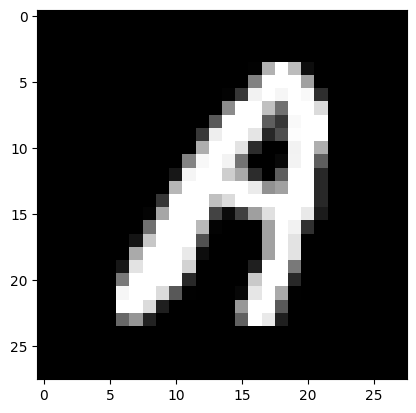

In [5]:
example = np.reshape(X[0],(28,28))
print(example)
plt.imshow(example,'gray')


In [6]:
shuffle_order = list(range(X.shape[0]))
shuffle_order = shuffle(shuffle_order)

X = X[shuffle_order]
y = y[shuffle_order]

In [7]:
# Hàm train_test_plit trả về các numpy, với tham số truyền vào là mảng numpy, dataframe. tham số thứ
# 2 là kích thước của tập test( 0.2 <=> 20% data hiện có)
# Việc tách dữ liệu hoàn toàn là ngẫu nhiên
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
"""
Thay doi kich thuoc cua data:
    Tu 1 mang numpy kich thuoc la [train_x.shape[0], 784] ->[train_x.shape[0], 28, 28]
    voi train_x.shape[0] la so bo data de training
"""
#khi training dùng bộ training
#val để đánh giá độ chính tăng hay giảm đi
#test: 



'\nThay doi kich thuoc cua data:\n    Tu 1 mang numpy kich thuoc la [train_x.shape[0], 784] ->[train_x.shape[0], 28, 28]\n    voi train_x.shape[0] la so bo data de training\n'

In [8]:
print(train_x.shape, test_x.shape, val_x.shape)

(238368, 784) (74490, 784) (59592, 784)


In [9]:
word_dict= {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
            10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',
            20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

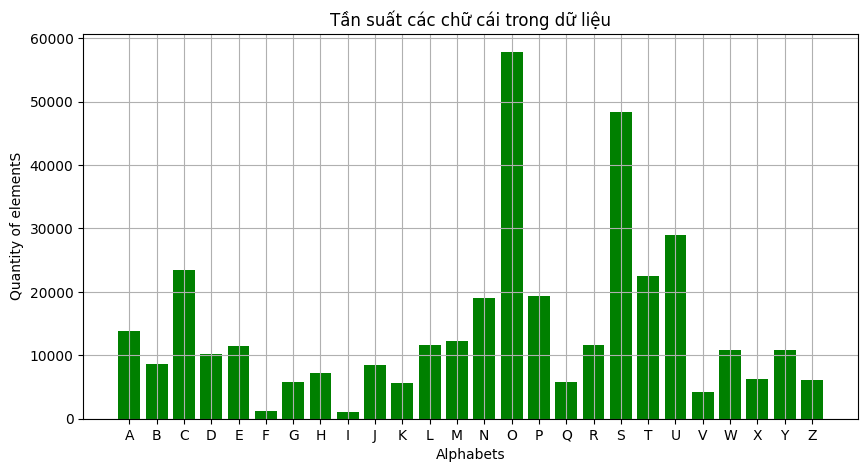

In [10]:


# dictx ={'a' : 10,
#         'b' : 12,
#         'c' : 10}
# a = ['a', 'c', 'b']
# b=[1,2,3]

# ax.bar(a, b, color='red')

count = np.zeros(26, dtype='int')
for i in y:
    count[int(i)] += 1

    alphabets = []
    for i in word_dict.values():
        alphabets.append(i)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(alphabets, count, color='green')

ax.set(title='Tần suất các chữ cái trong dữ liệu', xlabel='Alphabets', ylabel='Quantity of elementS')
plt.grid()
plt.show()

C
(28, 28)


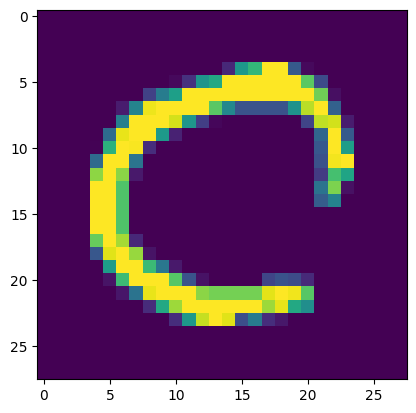

In [11]:
examp = np.reshape(train_x[0],(28,28))
print(word_dict[train_y[0]])
print(examp.shape)
plt.imshow(examp)

In [12]:
# Reshaping the train & set dataset to put in model
train_x = train_x.reshape(train_x.shape[0],28,28,1)

test_x = test_x.reshape(test_x.shape[0], 28, 28,1)

val_x = val_x.reshape(val_x.shape[0], 28, 28,1)

print('the new shape:\n',train_x.shape, test_x.shape, val_x.shape)

the new shape:
 (238368, 28, 28, 1) (74490, 28, 28, 1) (59592, 28, 28, 1)


In [13]:
# Ma hoa ve dang one hot
train_y_OHot = to_categorical(train_y, num_classes = 26, dtype='int')

test_y_OHot = to_categorical(test_y, num_classes = 26, dtype='int')

val_y_OHot = to_categorical(val_y, num_classes=26, dtype='int')

print('the new shape\n', train_y_OHot.shape, test_y_OHot.shape, val_y_OHot.shape)
print(test_y[0])

the new shape
 (238368, 26) (74490, 26) (59592, 26)
4.0


In [14]:
# Create model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', padding='same',input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [16]:
# compile − Định cấu hình quá trình học tập của mô hình
# fit − Đào tạo mô hình bằng cách sử dụng dữ liệu đào tạo
# evaluate − Đánh giá mô hình bằng cách sử dụng dữ liệu test
# predict − Dự đoán kết quả với dữ liệu đầu vào mới

# Các tham số trong hàm Compile:
"""
Loss: Trong học máy, hàm Loss được sử dụng để tìm lỗi hoặc sai lệch trong quá trình học. Keras yêu cầu hàm mất trong quá trình biên dịch mô hình.
Optimizer (Tối ưu):  Tối ưu hóa là một quá trình quan trọng nhằm tối ưu các trọng số đầu vào bằng cách so sánh dự đoán và hàm mất mát. 
    Keras cung cấp khá nhiều trình tối ưu hóa dưới dạng mô-đun, các trình tối ưu hóa và chúng như sau:
    keras.optimizers.Adam(
        learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
    )
Metrics: 
    Phương pháp đánh giá hệ thống phân lớp này là 'accuracy', tức số lượng điểm được phân loại đúng trong toàn bộ số điểm.
"""
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:

"""
"""
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_x, train_y_OHot, epochs=10, validation_data=(val_x, val_y_OHot), callbacks=[tensorboard_callback])

Epoch 1/10
7449/7449 [==============================] - 430s 58ms/step - loss: 0.1095 - accuracy: 0.9693 - val_loss: 0.0657 - val_accuracy: 0.9816
Epoch 2/10
7449/7449 [==============================] - 567s 76ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.0542 - val_accuracy: 0.9857
Epoch 3/10
7449/7449 [==============================] - 700s 94ms/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9899
Epoch 4/10
7449/7449 [==============================] - 611s 82ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0454 - val_accuracy: 0.9895
Epoch 5/10
7449/7449 [==============================] - 540s 73ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0424 - val_accuracy: 0.9913
Epoch 6/10
7449/7449 [==============================] - 614s 82ms/step - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0442 - val_accuracy: 0.9902
Epoch 7/10
7449/7449 [==============================] - 680s 91ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0

In [18]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9816418290138245, 0.9857027530670166, 0.9899315237998962, 0.989512026309967, 0.9913075566291809, 0.9901832342147827, 0.9915257096290588, 0.9909216165542603, 0.9914082288742065, 0.9902671575546265]
The training accuracy is : [0.9692911505699158, 0.9870620369911194, 0.9906237125396729, 0.9923983216285706, 0.9940512180328369, 0.994709849357605, 0.995414674282074, 0.9958299994468689, 0.9961655735969543, 0.9965053796768188]
The validation loss is : [0.0657198503613472, 0.0541568398475647, 0.04066936671733856, 0.04536107927560806, 0.042388029396533966, 0.04422134906053543, 0.046557020395994186, 0.05172518268227577, 0.048136644065380096, 0.05882982537150383]
The training loss is : [0.10946128517389297, 0.045089781284332275, 0.031962618231773376, 0.024747882038354874, 0.019297854974865913, 0.01748201996088028, 0.015470191836357117, 0.014451978728175163, 0.013499983586370945, 0.013218801468610764]


In [19]:
model.save('MyModel_With10Epochs2.h5')

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model = tensorflow.keras.models.load_model('Mymodel_With10Epochs2.h5')

In [21]:
# Đánh giá là một quá trình trong quá trình phát triển mô hình để kiểm tra xem liệu mô hình có phù hợp nhất với vấn đề đã cho 
    #và dữ liệu tương ứng hay không. Keras cung cấp chức năng, đánh giá mà không đánh giá của mô hình. Nó có ba đối số chính,
# Test data
# Test data label
scores = model.evaluate(test_x, test_y_OHot)
print(scores)

2328/2328 [==============================] - 55s 23ms/step - loss: 0.0516 - accuracy: 0.9907
[0.05162589251995087, 0.9906833171844482]


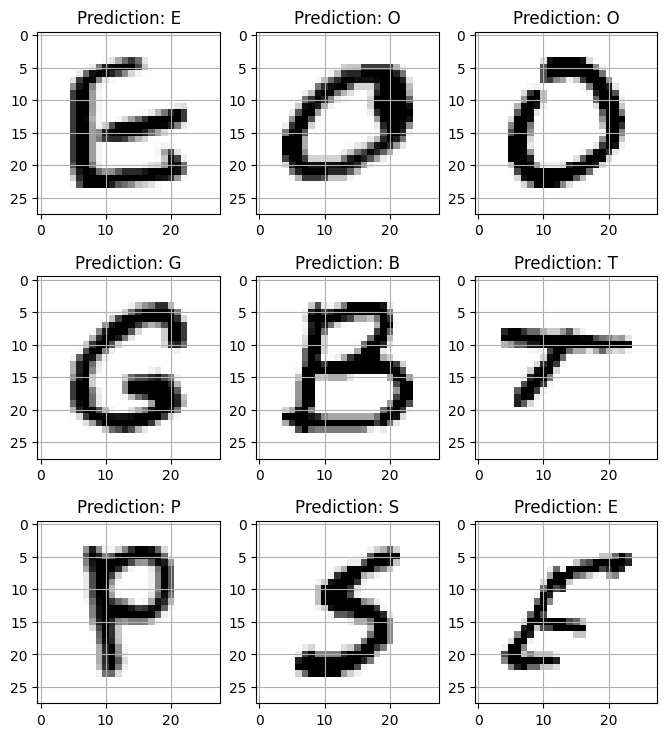

In [22]:
# Predict some test data
fig, axes = plt.subplots(3, 3, figsize=(8,9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_x[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_y_OHot[i])]
    ax.set_title("Prediction: " + pred)
    ax.grid()

In [28]:
# prediction on external image
img = cv2.imread('E:\CODE\BTL\imgTest/o.png', 1)
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 400))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))

img_pred = word_dict[np.argmax(model.predict(img_final))]


# cv2.putText(img, "Prediction: " + img_pred, (20, 410), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255, 0, 30))
# cv2.imshow("result", img)

img_pred

1/1 [==============================] - 0s 30ms/step


'D'